<a href="https://colab.research.google.com/github/baorz-gab/Test_GFB_DS_team/blob/main/Ejercicio2/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 2

Los datos que se usan en este Notebook fueron recopilados del siguiente URL: https://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?sector=6&accion=consultarCuadro&idCuadro=CF373&locale=es

In [27]:
# Tratamiento de datos
import numpy as np 
import pandas as pd 
from datetime import datetime
# Gráficos
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl

from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product

warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [28]:
#cargamos datos
from google.colab import files
files.upload()

Saving Tipo_de_cambio_pesos_dolar.csv to Tipo_de_cambio_pesos_dolar (1).csv


{'Tipo_de_cambio_pesos_dolar.csv': b'\xef\xbb\xbfFecha,Tipo de cambio\r\n03/01/2000,9.3949\r\n04/01/2000,9.4564\r\n05/01/2000,9.5455\r\n06/01/2000,9.5705\r\n07/01/2000,9.515\r\n10/01/2000,9.4464\r\n11/01/2000,9.478\r\n12/01/2000,9.5352\r\n13/01/2000,9.5057\r\n14/01/2000,9.4483\r\n17/01/2000,9.4172\r\n18/01/2000,9.4383\r\n19/01/2000,9.4086\r\n20/01/2000,9.4038\r\n21/01/2000,9.4463\r\n24/01/2000,9.4838\r\n25/01/2000,9.5288\r\n26/01/2000,9.5103\r\n27/01/2000,9.5123\r\n28/01/2000,9.5727\r\n31/01/2000,9.6253\r\n01/02/2000,9.5956\r\n02/02/2000,9.5724\r\n03/02/2000,9.5011\r\n04/02/2000,9.4803\r\n07/02/2000,9.4327\r\n08/02/2000,9.4018\r\n09/02/2000,9.3998\r\n10/02/2000,9.4348\r\n11/02/2000,9.4212\r\n14/02/2000,9.3988\r\n15/02/2000,9.388\r\n16/02/2000,9.371\r\n17/02/2000,9.3905\r\n18/02/2000,9.3592\r\n21/02/2000,9.4108\r\n22/02/2000,9.4395\r\n23/02/2000,9.4067\r\n24/02/2000,9.3798\r\n25/02/2000,9.3748\r\n28/02/2000,9.4033\r\n29/02/2000,9.3662\r\n01/03/2000,9.3633\r\n02/03/2000,9.3382\r\n03/03/2

In [3]:
datos = pd.read_csv('Tipo_de_cambio_pesos_dolar.csv')#leemos datos
datos.head() #primer vistazo a los datos

,Fecha,Tipo de cambio
0,03/01/2000,9.3949
1,04/01/2000,9.4564
2,05/01/2000,9.5455
3,06/01/2000,9.5705
4,07/01/2000,9.5150


In [4]:
datos['Fecha'] = pd.to_datetime(datos['Fecha'], format='%d/%m/%Y') #convertimos las fechas a datetime

In [29]:
#indicamos donde empiezan los datos y donde terminan
pd.date_range(start = '03/01/2000', end = '12/11/2021' ).difference(datos.index)


DatetimeIndex(['2000-03-04', '2000-03-05', '2000-03-11', '2000-03-12',
               '2000-03-18', '2000-03-19', '2000-03-21', '2000-03-25',
               '2000-03-26', '2000-04-01',
               ...
               '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05',
               '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09',
               '2021-12-10', '2021-12-11'],
              dtype='datetime64[ns]', length=2493, freq=None)

In [32]:
datos.describe() #estadistica descriptiva

,Tipo de cambio
count,5505.000000
mean,13.862240
std,3.862027
min,8.942800
25%,10.855800
50%,12.798100
75%,17.907300
max,25.118500


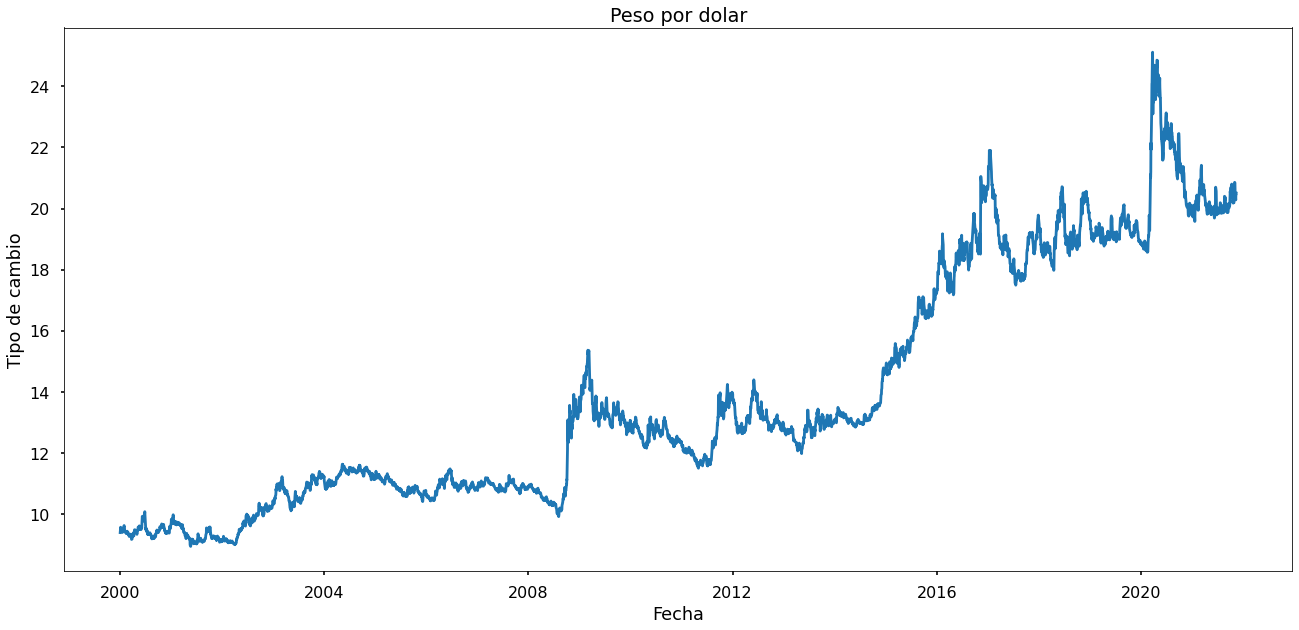

In [30]:
# Tipo de cambio pesos por dolar diario
plt.figure(figsize=(22,10))
plt.plot(datos['Fecha'],datos['Tipo de cambio'])
plt.title("Peso por dolar")
plt.xlabel("Fecha")
plt.ylabel("Tipo de cambio")
plt.show()

# creemos la sere de tiempo conforme al tipo de cambio
timeSeries = datos
timeSeries.index = timeSeries['Fecha']
ts = timeSeries.drop("Fecha",axis=1)

In [7]:
datos.Fecha = pd.to_datetime(datos.Fecha, unit='s')
# Remuestreo a frecuencia diaria
datos.index = datos.Fecha
df = datos.resample('D').mean()

# Remuestreo a frecuencia mensual
df_month = datos.resample('M').mean()

# Remuestreo a frecuencia anual
df_year = datos.resample('A-DEC').mean()

# Remuestreo a frecuencia cuartil
df_Q = datos.resample('Q-DEC').mean()

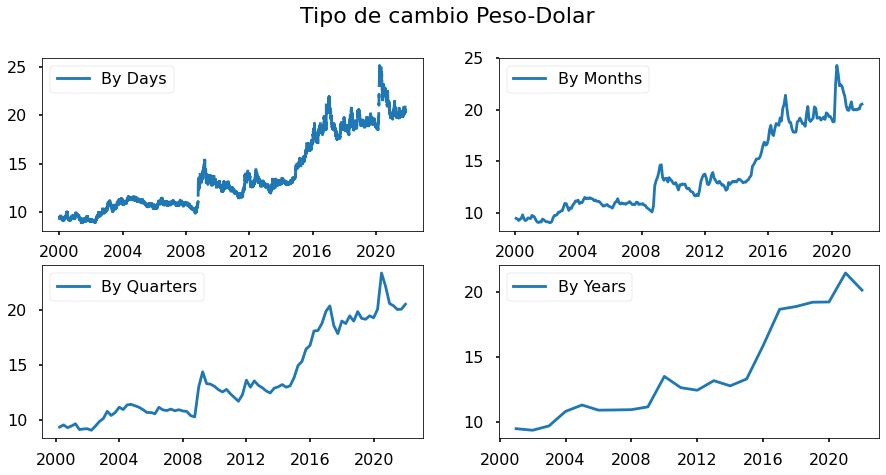

In [33]:
# Graficamos
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Tipo de cambio Peso-Dolar', fontsize=22)

plt.subplot(221)
plt.plot(df['Tipo de cambio'], '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month['Tipo de cambio'], '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q['Tipo de cambio'], '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year['Tipo de cambio'], '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

Dickey–Fuller test: p=0.875450


<Figure size 1080x864 with 0 Axes>

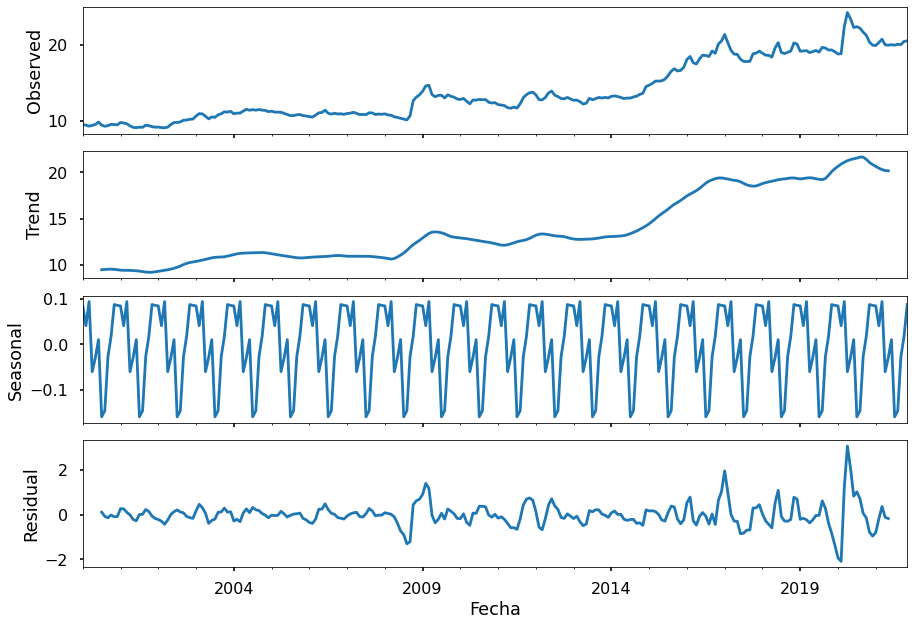

In [34]:
#Descomposición estacional
plt.figure(figsize=[15,12])
sm.tsa.seasonal_decompose(df_month['Tipo de cambio']).plot()
#Prueba Dickey-Fuller
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month['Tipo de cambio'])[1])
plt.show()

In [35]:
# Box-Cox Transformations
df_month['Tipo_de_cambio_box'], lmbda = stats.boxcox(df_month['Tipo de cambio'])
print("Box Cox Transgform test: p=%f" % sm.tsa.stattools.adfuller(df_month['Tipo de cambio'])[1])

Dickey–Fuller test: p=0.875450


Es estacionaria la serie

In [19]:
# Estacionalidad differentiation
df_month['box_diff'] = df_month.Tipo_de_cambio_box - df_month.Tipo_de_cambio_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.box_diff[12:])[1])

Dickey–Fuller test: p=0.005638


La serie ya no es estacionaria

Dickey–Fuller test: p=0.000000


<Figure size 1080x864 with 0 Axes>

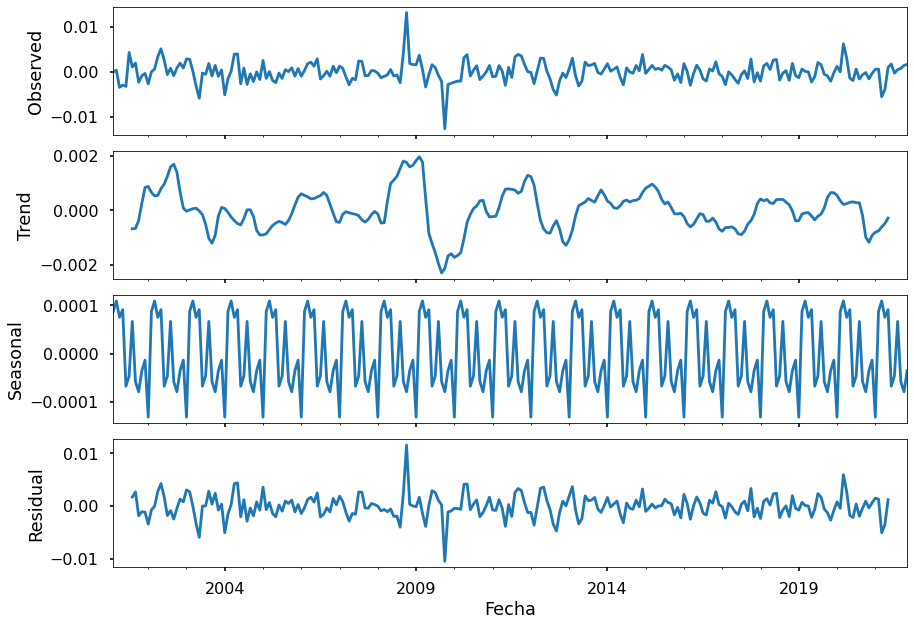

In [36]:
# Regular differentiation (diferenciación regular)
df_month['box_diff2'] = df_month.box_diff - df_month.box_diff.shift(1)
plt.figure(figsize=(15,12))

# STL-decomposition (descomposición estacional)
sm.tsa.seasonal_decompose(df_month.box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.box_diff2[13:])[1])

plt.show()

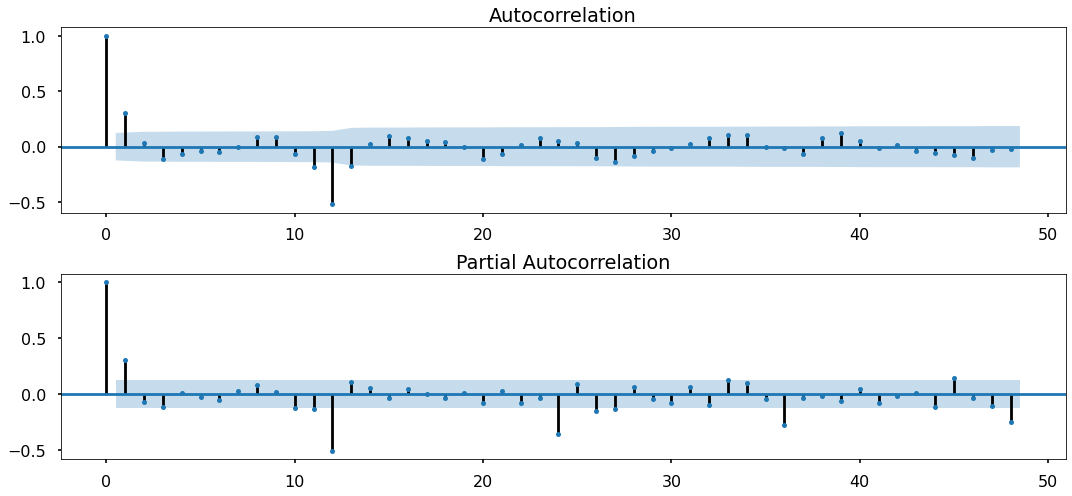

In [13]:
#Aproximación inicial de parámetros usando gráficos de autocorrelación y autocorrelación parcialplt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.box_diff2[13:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
# Aproximación inicial de parametros
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Seleccion de modelo
results = [] #arreglo para resultados de mejores modelos 
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Tipo_de_cambio_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [22]:
# Elegir mejor modelo
result_table = pd.DataFrame(results) 
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters          aic
9   (0, 1, 1, 1) -2475.424943
15  (0, 2, 1, 1) -2474.635341
1   (0, 0, 0, 1) -2469.759283
11  (0, 1, 2, 1) -2467.063512
17  (0, 2, 2, 1) -2465.881597
                                 Statespace Model Results                                 
Dep. Variable:                 Tipo_de_cambio_box   No. Observations:                  263
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                1241.712
Date:                            Tue, 16 Nov 2021   AIC                          -2475.425
Time:                                    21:38:02   BIC                          -2461.339
Sample:                                01-31-2000   HQIC                         -2469.756
                                     - 11-30-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

Dickey–Fuller test:: p=0.000000


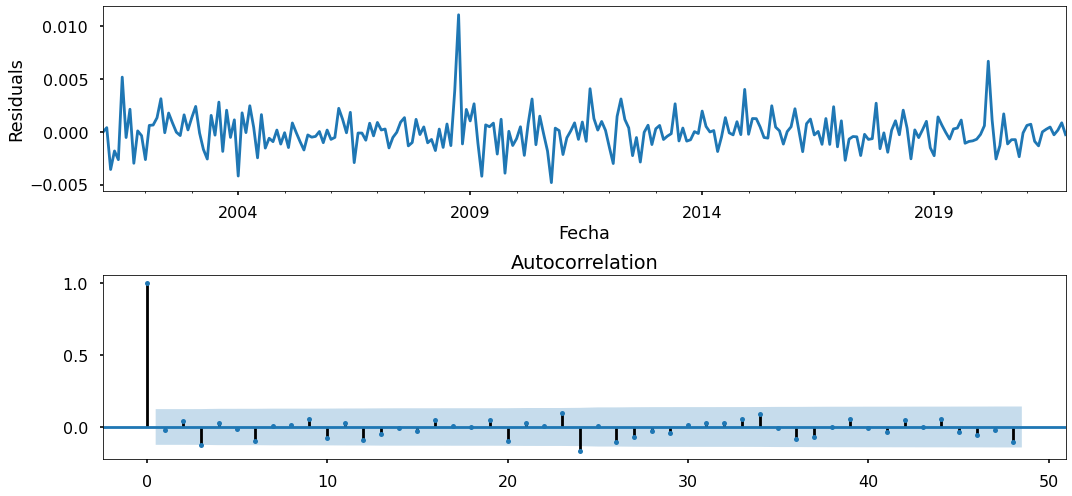

In [23]:
# descomposición estacional
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [24]:
# Fucnión Boc-Cox Transformación inversa
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

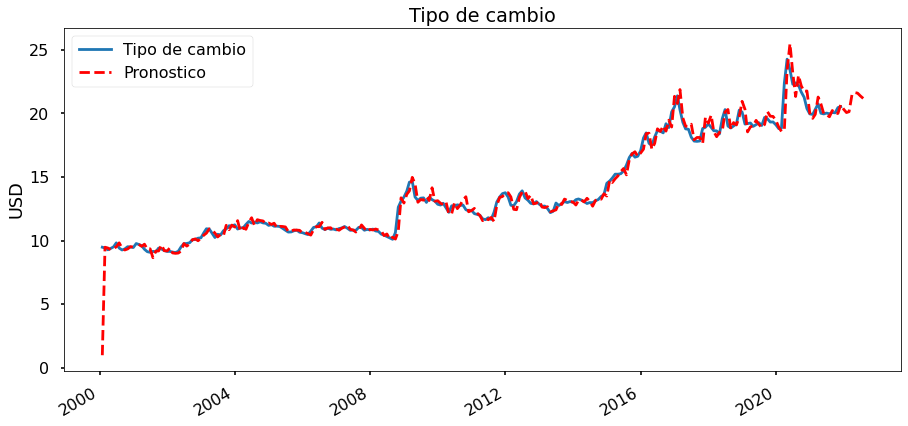

In [26]:
# Prediccion
df_month2 = df_month[['Tipo de cambio']]
date_list = [datetime(2021,11,30), datetime(2021,12,31), datetime(2022,1,31), datetime(2022,2,28), 
             datetime(2022,3,31), datetime(2022,4,30), datetime(2022,5,31), datetime(2022,6,30),
             datetime(2022,7,31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=272), lmbda)
plt.figure(figsize=(15,7))
df_month2['Tipo de cambio'].plot()
df_month2.forecast.plot(color='r', ls='--', label='Pronostico')
plt.legend()
plt.title('Tipo de cambio')
plt.ylabel('USD')
plt.show()